Data Mining Project : The objective of the project is to  share my analysis as to whether an SBA loan should be approved or denied based on the provided SBA loan data

In [1]:
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt
#import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load SBAnational.csv file for the analysis
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Capstone/SBAnational.csv')

In [3]:
data.head()

LoanNr_ChkDgt                           Name          City State    Zip                           Bank BankState   NAICS ApprovalDate ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural RevLineCr LowDoc ChgOffDate DisbursementDate DisbursementGross BalanceGross MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997    84      4       2.0          0            0              1           0         N      Y        NaN        28-Feb-99       $60,000.00        $0.00       P I F       $0.00    $60,000.00    $48,000.00 
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526                1ST SOURCE BANK        IN  722410    28-Feb-97       1997    60      2       2.0          0            0              1           0         N      Y        NaN        31-May-97       $40,000.00        $0.00       P I F       $0.00    $40,000.00    $32,000.00 
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   180      7       1.0          0            0              1           0         N      N        NaN        31-Dec-97      $287,000.00        $0.00       P I F       $0.00   $287,000.00   $215,250.00 
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997    60      2       1.0          0            0              1           0         N      Y        NaN        30-Jun-97       $35,000.00        $0.00       P I F       $0.00    $35,000.00    $28,000.00 
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   240     14       1.0          7            7              1           0         N      N        NaN        14-May-97      $229,000.00        $0.00       P I F       $0.00   $229,000.00   $229,000.00

In [4]:
data.shape # Information about rows and column

(899164, 27)

DATA CLEANING

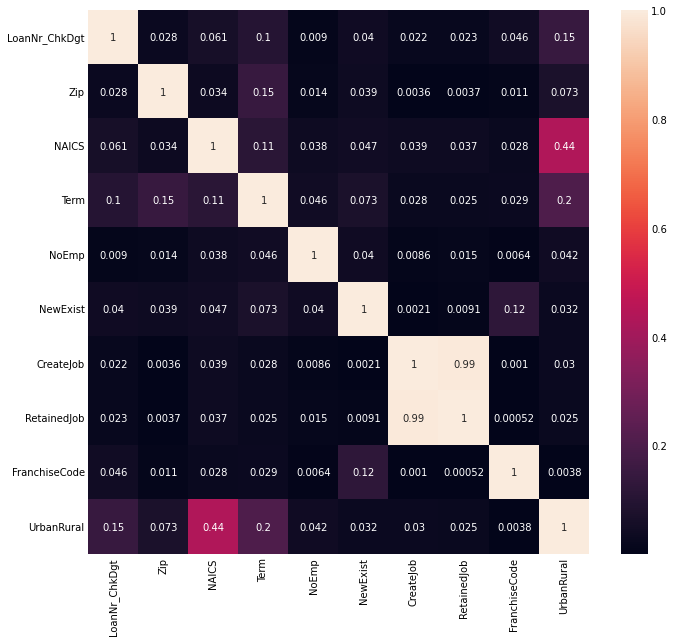

In [5]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr().abs(),  annot=True)

Not much correlation between the variables

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

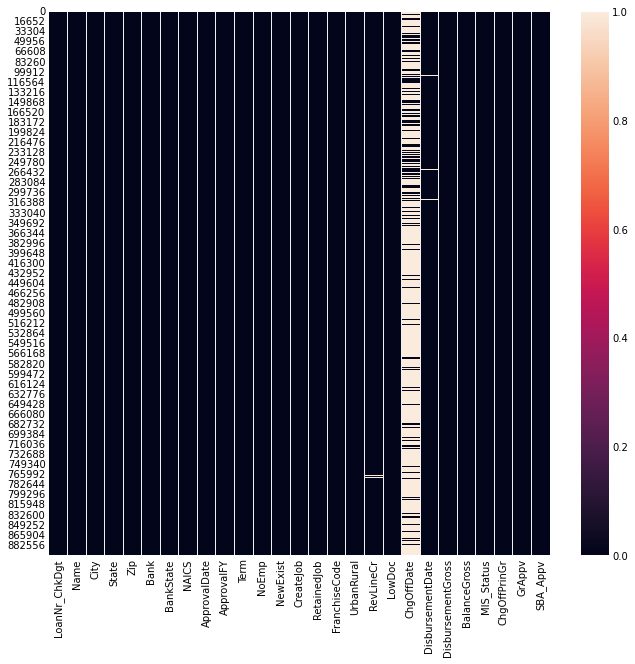

In [6]:
#Hitmap to check the null or drop columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull()) ##to visualize the missing values
data.isnull().sum()

Chagoffdate, RevLineCr, DisbursementDate etc has missing values as shown in the picture

I'm not concerned with ChgOffDate since we're focused on whether or not a loan gets charged off at all rather than when it happens, but the other columns could pose issues. Let's start by removing records from some of these columns with null values.

I decided to remove the rows entirely rather than imputing as we have a large dataset. It is hard to impute data based on nature of information. As an example it is difficult to impute whether the business was new or existing without knowing and which could potentially give model error in future.

In [7]:
# Drop null values from specified columns
data.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)
data.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

Ok, Now only ChgOffDate has missing values, we can drop this column entirely in future. 

I want to check the data format now for my analysys

EXPLORATORY ANALYSIS

In [8]:
# Checking data types 
data.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

I can notice currency is marked as object instead of integer. We need to change the data type

In [9]:
data[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head() # would gives us data representations

DisbursementGross BalanceGross ChgOffPrinGr        GrAppv      SBA_Appv
0       $60,000.00        $0.00        $0.00    $60,000.00    $48,000.00 
1       $40,000.00        $0.00        $0.00    $40,000.00    $32,000.00 
2      $287,000.00        $0.00        $0.00   $287,000.00   $215,250.00 
3       $35,000.00        $0.00        $0.00    $35,000.00    $28,000.00 
4      $229,000.00        $0.00        $0.00   $229,000.00   $229,000.00

It looks like these are representated as strings because the '$' sign and commas are included. I can't change the type to a float without removing those, so I make those edits here.

In [10]:
# Remove '$', commas, and extra spaces from records in columns with dollar values that should be floats
data[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
data[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

For ApprovalFY we need to do some further work similarly

In [11]:
# Check the number of each data type in the field
data['ApprovalFY'].apply(type).value_counts()

<class 'int'>    759570
<class 'str'>    126670
Name: ApprovalFY, dtype: int64

In [12]:
data['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

We could see the data 'ApprovalFY' has mixture of integer and strings and one even ends with A. Next I would clean this segment

In [13]:
# Create a function to apply formatting to the records of str type only
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x


data['ApprovalFY'] = data['ApprovalFY'].apply(clean_str).astype('int64') # Converting to integer

In [14]:
# Change the type of NewExist to an integer, Zip and UrbanRural to str (categorical) and all currency-related fields to float values
data = data.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

# Check to see dtypes so far
data.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                   object
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist               int64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural            object
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

I want to address the NAICS codes next. We're only really concerned with the general industry for this analysis, so we use the first two digits of each business's NAICS code to determine this. In the data description I have given the list of the industries which each and every code represents and I would like to assign the same here for better visualization and analysis.


In [15]:
# Create a new column with the industry the NAICS code represents
# Select only the first two numbers of the NAICS code
data['Industry'] = data['NAICS'].astype('str').apply(lambda x: x[:2])

# Mapping the approprate industry to each record based on the first two digits of the NAICS code
data['Industry'] = data['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

# Remove records where Industry is NaN (NAICS code was a 0)
data.dropna(subset=['Industry'], inplace=True)


Creating a flat column ( 0,1) for the franchisecode. Might drop in the model in future if not relevant

In [16]:
# Create flag column IsFranchise based on FranchiseCode column
data.loc[(data['FranchiseCode'] <= 1), 'IsFranchise'] = 0
data.loc[(data['FranchiseCode'] > 1), 'IsFranchise'] = 1

I look at some of the fields that are considered flags already but aren't necessarily in a useable format right now. These include the NewExist, RevLineCr, LowDoc, and MIS_Status fields.

In [17]:
# NewExist
# Makesure NewExist has only 1s and 2s; Remove records where NewExist isn't 1 or 2
data['NewExist'].unique()

array([2, 1, 0])

In [18]:
# Keep records where NewExist == 1 or 2
data = data[(data['NewExist'] == 1) | (data['NewExist'] == 2)]

# Create NewBusiness field where 0 = Existing business and 1 = New business; based on NewExist field
data.loc[(data['NewExist'] == 1), 'NewBusiness'] = 0
data.loc[(data['NewExist'] == 2), 'NewBusiness'] = 1

In [19]:
# Checking RevLineCr unique values
data['RevLineCr'].unique()

array(['N', 'Y', '0', 'T', '`', ',', '1', 'C', '2', 'R', '7', 'A', '-',
       'Q'], dtype=object)

In [20]:
# Checking LowDoc unique values
data['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [21]:
# Remove records where RevLineCr != 'Y' or 'N' and LowDoc != 'Y' or 'N'
data = data[(data['RevLineCr'] == 'Y') | (data['RevLineCr'] == 'N')]
data = data[(data['LowDoc'] == 'Y') | (data['LowDoc'] == 'N')]

# RevLineCr and LowDoc: 0 = No, 1 = Yes
data['RevLineCr'] = np.where(data['RevLineCr'] == 'N', 0, 1)
data['LowDoc'] = np.where(data['LowDoc'] == 'N', 0, 1)

print(data['RevLineCr'].unique())
print(data['LowDoc'].unique())

[0 1]
[1 0]


In [22]:
data['Default'] = np.where(data['MIS_Status'] == 'P I F', 0, 1)
data['Default'].value_counts()

0    358558
1     98382
Name: Default, dtype: int64

In [23]:
# Convert ApprovalDate and DisbursementDate columns to datetime values
# ChgOffDate not changed to datetime since it is not of value and will be removed later
data[['ApprovalDate', 'DisbursementDate']] = data[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

One metric I thought of that would be interesting to see is the number of days it took from the approval of the loan to the actual disbursement of the funds. My hypothesis is that the timing at which the funds were received could have a negative relationship with a business's ability to repay a loan, whereas the longer it took to receive funds, the more difficult it would be to pay off the loan.

In [24]:
# Create DaysToDisbursement column which calculates the number of days passed between DisbursementDate and ApprovalDate
data['DaysToDisbursement'] = data['DisbursementDate'] - data['ApprovalDate']

# Change DaysToDisbursement from a timedelta64 dtype to an int64 dtype
# Converts series to str, removes all characters after the space before 'd' in days for each record, then changes the dtype to int
data['DaysToDisbursement'] = data['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [25]:
# Create DisbursementFY field for time selection criteria later
data['DisbursementFY'] = data['DisbursementDate'].map(lambda x: x.year)

Another metric I was interested in exploring is whether or not the bank servicing the loan was in the same state that the business was located. My assumption is that it would be more difficult to service a loan for a business in another state and that this could have a negative impact on a business's ability to repay the loan.

In [26]:
# Create StateSame flag field which identifies where the business State is the same as the BankState
data['StateSame'] = np.where(data['State'] == data['BankState'], 1, 0)

The next field I decided to create relates to the amount of the loan the SBA guaranteed. This is a unique feature SBA loans have where the SBA will 'guaranty' a percentage of the loan in the event of a loss. For example if a business took out a 500,000 loan and the SBA guaranteed 50%, if the business was unable to repay 200,000 of the loan the SBA would cover 100,000 of that loss. This makes these loans very attractive to small businesses because it mitigates their risk, but it also increases the risk for the SBA.

In [27]:
# Create SBA_AppvPct field since the guaranteed amount is based on a percentage of the gross loan amount rather than dollar amount in most situations
data['SBA_AppvPct'] = data['SBA_Appv'] / data['GrAppv']

I wanted to look at whether the loan amount disbursed was equal to the full amount approved

In [28]:
# Create AppvDisbursed flag field signifying if the loan amount disbursed was equal to the full amount approved
data['AppvDisbursed'] = np.where(data['DisbursementGross'] == data['GrAppv'], 1, 0)

In [29]:
#Check the data type once again with new datasets
data.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [30]:
# Format dtypes where necessary ( Changing Franchise, newbusiness to integer)
data = data.astype({'IsFranchise': 'int64', 'NewBusiness': 'int64'})
data.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

I can remove the fields that won't provide much value to the analysis. These are as follows:

LoanNr_ChkDgt and Name - provides no value to the actual analysis

*   LoanNr_ChkDgt and Name - provides no value to the actual analysis
*   City and Zip - each have a large number of unique values, and my assumption is that it is not likely either would have any particularly significant values
*   Bank - Name of the bank shouldn't matter for analysis, however this could potentially be used when revisiting this analysis to determine the asset size of the bank servicing the loan
*   ChgOffDate - only applies when a loan is charged off and isn't relevant to the analysis
*   NAICS - replaced by Industry
*   NewExist - replaced by NewBusiness flag field
*   FranchiseCode - replaced by IsFranchise flag field
*   ApprovalDate and DisbursementDate - hypothesis that DaysToDisbursement will be more valueable
*   SBA_Appv - guaranteed amount is based on percentage of gross loan amount, not dollar amount typically
*   MIS_Status - Default field replaces this as the target field

In [31]:
data.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode',
                      'ChgOffDate', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'], inplace=True)

In [32]:
data.isnull().sum()

State                 0
BankState             0
ApprovalFY            0
Term                  0
NoEmp                 0
CreateJob             0
RetainedJob           0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
GrAppv                0
Industry              0
IsFranchise           0
NewBusiness           0
Default               0
DaysToDisbursement    0
DisbursementFY        0
StateSame             0
SBA_AppvPct           0
AppvDisbursed         0
dtype: int64

No Null values in the dataset now

In [33]:
# Check the shape of the data now
data.shape

(456940, 21)

 I wanted to look at are whether a loan was backed by Real Estate, and whether a loan was active during the Great Recession (2007-2009). These were both mentioned in the document which describes the dataset and how it was used for educatoinal purposes, and I think they will be very important features to consider.

To determine whether a loan was backed by Real Estate, I made a flag that signifies if the loan term is >= 20 years, as real estate-backed loans are typically at least this long since the loan term is usually tied to the useful life of the assets used for collateral. Unfortunately there's no way to know this for sure since it is not included explicitely in the data.

For loans active during the Great Recession, I created a flag for loans where the Great Recession (2007-2009) between DisbursementFY and DisbursementFY plus the loan term (in years).

In [34]:
# Field for loans backed by Real Estate (loans with a term of at least 20 years)
data['RealEstate'] = np.where(data['Term'] >= 240, 1, 0)

# Field for loans active during the Great Recession (2007-2009)
data['GreatRecession'] = np.where(((2007 <= data['DisbursementFY']) & (data['DisbursementFY'] <= 2009)) | 
                                     ((data['DisbursementFY'] < 2007) & (data['DisbursementFY'] + (data['Term']/12) >= 2007)), 1, 0)

When it comes to the time period for the records used in the analysis and modeling later, I think the document provided with the dataset had good rationale. This rationale is listed in the 3.3 Time Period section of the document, but to summarize, the emphasis was placed on default rates of loans disbursed through 2010. They wanted to account for the Great Recession and restrict the time frame to loans by excluding those disbursed after 2010 since the loan term is typically 5 years or more.

I wanted to adopt this for my analysis as well, so I set a selection criteria for loans with a disbursement date prior to 2010.

In [35]:
# Select only records with a disbursement year through 2010
data = data[data['DisbursementFY'] <= 2010]

# Check how many records remain
data.shape

(438504, 23)

DATA ANALYSIS

In [36]:
data.describe(include=['object', 'float', 'int'])

State BankState     ApprovalFY           Term          NoEmp      CreateJob    RetainedJob UrbanRural      RevLineCr         LowDoc  DisbursementGross        GrAppv      Industry    IsFranchise    NewBusiness        Default  DaysToDisbursement  DisbursementFY      StateSame    SBA_AppvPct  AppvDisbursed     RealEstate  GreatRecession
count   438504    438504  438504.000000  438504.000000  438504.000000  438504.000000  438504.000000     438504  438504.000000  438504.000000       4.385040e+05  4.385040e+05        438504  438504.000000  438504.000000  438504.000000       438504.000000   438504.000000  438504.000000  438504.000000  438504.000000  438504.000000   438504.000000
unique      51        53            NaN            NaN            NaN            NaN            NaN          3            NaN            NaN                NaN           NaN            20            NaN            NaN            NaN                 NaN             NaN            NaN            NaN            NaN            NaN             NaN
top         CA        NC            NaN            NaN            NaN            NaN            NaN          1            NaN            NaN                NaN           NaN  Retail_trade            NaN            NaN            NaN                 NaN             NaN            NaN            NaN            NaN            NaN             NaN
freq     59171     55644            NaN            NaN            NaN            NaN            NaN     270482            NaN            NaN                NaN           NaN         78626            NaN            NaN            NaN                 NaN             NaN            NaN            NaN            NaN            NaN             NaN
mean       NaN       NaN    2002.665604      94.119445       9.794887       1.843611       4.568973        NaN       0.418959       0.057247       1.663462e+05  1.489304e+05           NaN       0.030597       0.263840       0.221918          109.090631     2002.705704       0.454094       0.654071       0.636478       0.111972        0.733934
std        NaN       NaN       5.492623      68.548785      57.674184      16.496650      15.330176        NaN       0.493389       0.232314       2.515612e+05  2.397083e+05           NaN       0.172224       0.440714       0.415537          182.221498        5.403909       0.497889       0.179932       0.481014       0.315332        0.441900
min        NaN       NaN    1984.000000       0.000000       0.000000       0.000000       0.000000        NaN       0.000000       0.000000       4.000000e+03  1.000000e+03           NaN       0.000000       0.000000       0.000000        -3614.000000     1984.000000       0.000000       0.050000       0.000000       0.000000        0.000000
25%        NaN       NaN    1999.000000      58.000000       2.000000       0.000000       0.000000        NaN       0.000000       0.000000       3.499100e+04  2.500000e+04           NaN       0.000000       0.000000       0.000000           27.000000     2000.000000       0.000000       0.500000       0.000000       0.000000        0.000000
50%        NaN       NaN    2005.000000      84.000000       4.000000       0.000000       1.000000        NaN       0.000000       0.000000       7.500000e+04  5.000000e+04           NaN       0.000000       0.000000       0.000000           51.000000     2005.000000       0.000000       0.500000       1.000000       0.000000        1.000000
75%        NaN       NaN    2007.000000      90.000000       9.000000       1.000000       4.000000        NaN       1.000000       0.000000       1.880000e+05  1.510000e+05           NaN       0.000000       1.000000       0.000000          109.000000     2007.000000       1.000000       0.829994       1.000000       0.000000        1.000000
max        NaN       NaN    2011.000000     527.000000    9999.000000    5621.000000    4441.000000        NaN       1.000000       1.000000       1.144632e+07  5.000000e+06           NaN       1.000000       1.000

This shows some interesting information for the analysis, including:

*   The average loan term is ~94 months with a standard deviation of ~69 months, suggesting the loan terms are pretty spread out;
*   Max loan term of 527 months could suggest some outliers in the data
The average number of employees is about 9.8 with 75% of of businesses having 9 or less employees, suggesting NoEmp is very left skewed; Similar situations for created and retained jobs
*   The mean for flag fields essentially shows a percentage, so roughly 42% of loans in the sample are revolving lines of credit and about 6% of loans were a part of the Low Doc program
*   Average gross loan disbursement was ~166,000 with 75% of loans being less than 188,000, suggesting left skewness again
About 77.8% of loans in the sample were paid in full
Only 3% of businesses were franchised; 
*   About 26% of loan applicants were considered new businesses.
The average days to loan disbursement was 109;The min was -3,614, suggesting at least one error in the data (since that's ~301 years)
*   Approximately 45.4% of loans were serviced by banks in the same state as the applying business
*   The average percentage of SBA loan guaranteed amount was 65.4%
*   About 11.2% of the loans backed by real estate per my assumptions
*   About 73.4% of the loans in the sample were active at some point during the Great Recession

In [37]:
# Create flag to signify if a larger amount was disbursed than what the Bank had approved
# Likely RevLineCr?
data['DisbursedGreaterAppv'] = np.where(data['DisbursementGross'] > data['GrAppv'], 1, 0)

In [38]:
# Remove records with loans disbursed prior to being approved
data = data[data['DaysToDisbursement'] >= 0]

# Check how many records are left
data.shape

(438090, 24)

In [39]:
data.describe(include=['object', 'float', 'int'])

State BankState     ApprovalFY           Term          NoEmp      CreateJob    RetainedJob UrbanRural      RevLineCr         LowDoc  DisbursementGross        GrAppv      Industry    IsFranchise    NewBusiness        Default  DaysToDisbursement  DisbursementFY      StateSame    SBA_AppvPct  AppvDisbursed     RealEstate  GreatRecession  DisbursedGreaterAppv
count   438090    438090  438090.000000  438090.000000  438090.000000  438090.000000  438090.000000     438090  438090.000000  438090.000000       4.380900e+05  4.380900e+05        438090  438090.000000  438090.000000  438090.000000       438090.000000   438090.000000  438090.000000  438090.000000  438090.000000  438090.000000   438090.000000         438090.000000
unique      51        53            NaN            NaN            NaN            NaN            NaN          3            NaN            NaN                NaN           NaN            20            NaN            NaN            NaN                 NaN             NaN            NaN            NaN            NaN            NaN             NaN                   NaN
top         CA        NC            NaN            NaN            NaN            NaN            NaN          1            NaN            NaN                NaN           NaN  Retail_trade            NaN            NaN            NaN                 NaN             NaN            NaN            NaN            NaN            NaN             NaN                   NaN
freq     59121     55628            NaN            NaN            NaN            NaN            NaN     270261            NaN            NaN                NaN           NaN         78554            NaN            NaN            NaN                 NaN             NaN            NaN            NaN            NaN            NaN             NaN                   NaN
mean       NaN       NaN    2002.662987      94.113178       9.795026       1.843525       4.567514        NaN       0.419122       0.057189       1.663169e+05  1.488998e+05           NaN       0.030610       0.263825       0.222039          109.220368     2002.703264       0.453993       0.654037       0.636351       0.111979        0.734509              0.314639
std        NaN       NaN       5.490509      68.545279      57.699074      16.503378      15.332166        NaN       0.493416       0.232204       2.515088e+05  2.396534e+05           NaN       0.172259       0.440706       0.415618          182.165509        5.401641       0.497879       0.179937       0.481050       0.315341        0.441595              0.464372
min        NaN       NaN    1984.000000       0.000000       0.000000       0.000000       0.000000        NaN       0.000000       0.000000       4.000000e+03  1.000000e+03           NaN       0.000000       0.000000       0.000000            0.000000     1984.000000       0.000000       0.050000       0.000000       0.000000        0.000000              0.000000
25%        NaN       NaN    1999.000000      58.000000       2.000000       0.000000       0.000000        NaN       0.000000       0.000000       3.498000e+04  2.500000e+04           NaN       0.000000       0.000000       0.000000           27.000000     2000.000000       0.000000       0.500000       0.000000       0.000000        0.000000              0.000000
50%        NaN       NaN    2005.000000      84.000000       4.000000       0.000000       1.000000        NaN       0.000000       0.000000       7.500000e+04  5.000000e+04           NaN       0.000000       0.000000       0.000000           51.000000     2005.000000       0.000000       0.500000       1.000000       0.000000        1.000000              0.000000
75%        NaN       NaN    2007.000000      90.000000       9.000000       1.000000       4.000000        NaN       1.000000       0.000000       1.880000e+05  1.510000e+05           NaN       0.000000       1.000000       0.000000          109.000000     2007.000000       1.000000       0.829500       1.000000       0.000000        1.0

DATA VISUALIZATION

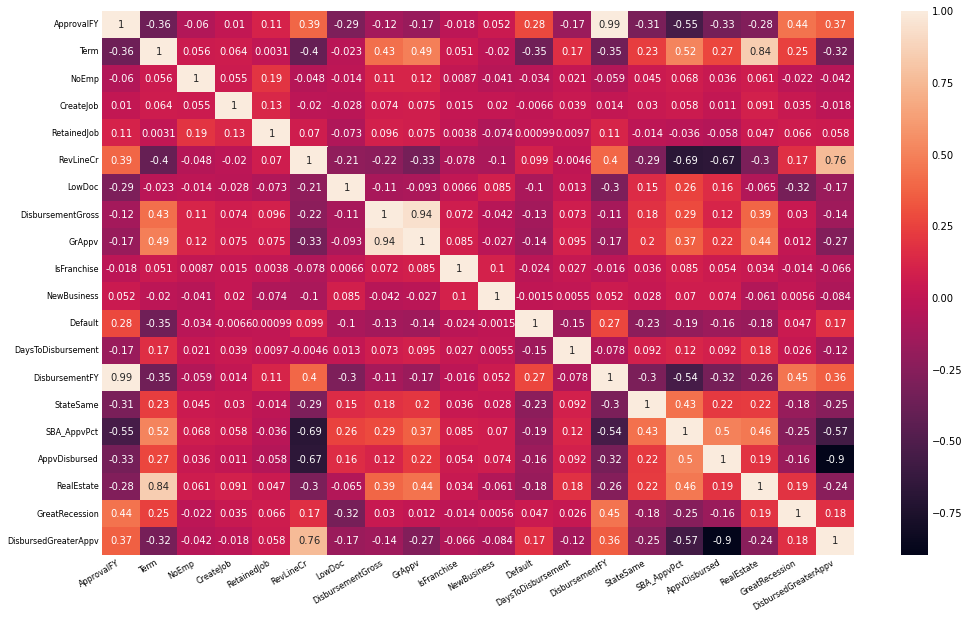

In [40]:
# Creating Correlation Matrix again with cleaned data
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
corr_matrix = data.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

Some notable correlations:

-GrAppv & DisbursementGross, Positive 
-DisbursedGreaterAppv & AppvDisbursed, Negative 
-RevLineCr & DisbursedGreaterAppv, Positive 
-DisbursementFY & ApprovalFY, Positive 
-AppvDisbursed & RevLineCr, Negative 
-SBA_AppvPct & RevLineCr, Negative 

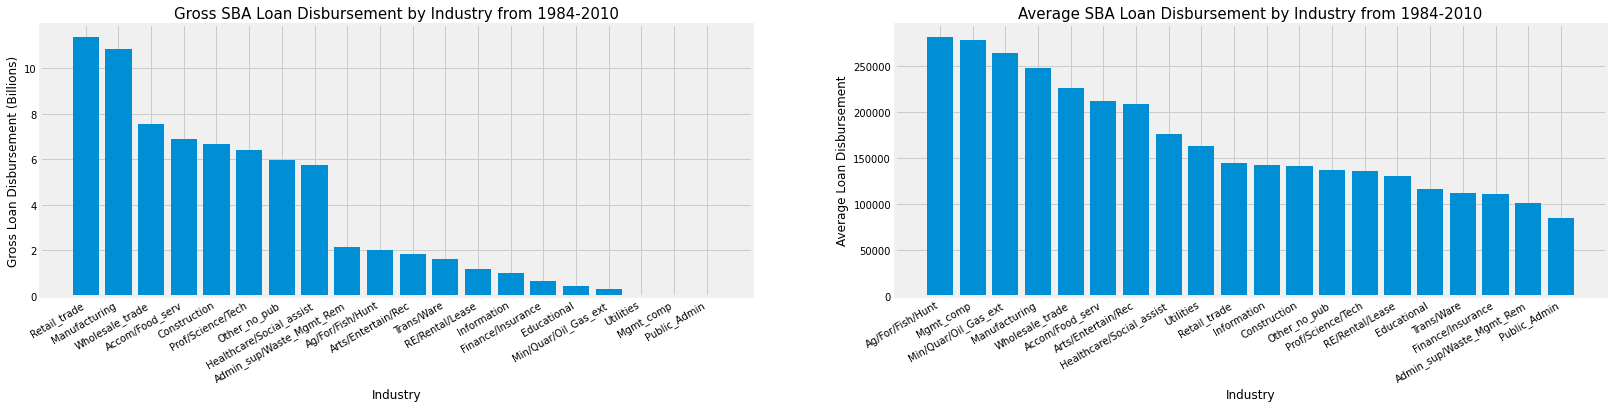

In [41]:
# Total/Average disbursed loan amount by industry
# Create a groupby object on Industry for use in visualization
industry_group = data.groupby(['Industry'])

# Data frames based on groupby by Industry looking at aggregate and average values
df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

# Establish figure for placing bar charts side-by-side
pic = plt.figure(figsize=(25, 5))

# Add subplots to figure to build 1x2 grid and specify position of each subplot
ax1 = pic.add_subplot(1, 2, 1)
ax2 = pic.add_subplot(1, 2, 2)

import matplotlib.pyplot as plt
# Bar chart 1 = Gross SBA Loan Disbursement by Industry
ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Gross Loan Disbursement (Billions)')

# Bar chart 2 = Average SBA Loan Disbursement by Industry
ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Average Loan Disbursement')

plt.show()

Retail trade and Manufacturing industries had significantly more loan funds distributed to them during the sample period compared to other industries
Although the Agriculture, forestry, fishing and hunting, Mining, quarrying, and oil and gas extraction, and Management of companies and enterprises industries had a small amount of total loan funds distributed to them during this time relative to most other industries, they had the highest average loan amount compared to other industries; This suggests they had a small number of large loans

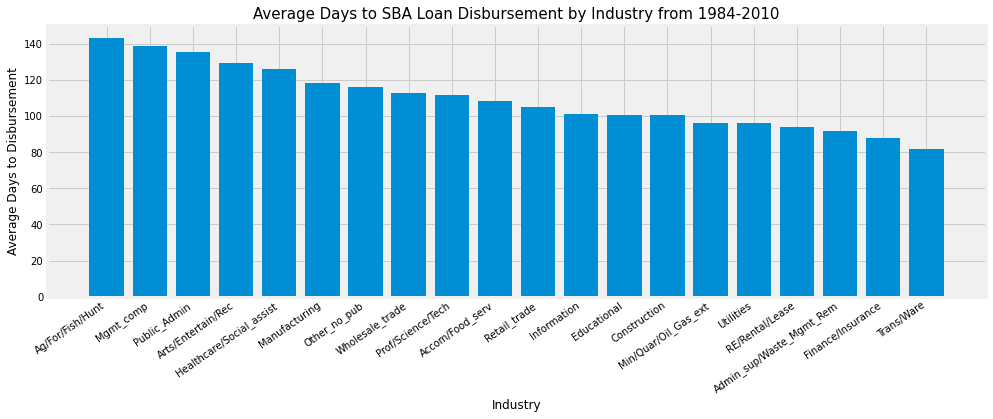

In [42]:
# Average days to disbursement by industry
pic2, ax = plt.subplots(figsize=(15, 5))

ax.bar(df_industryAve.index, df_industryAve['DaysToDisbursement'].sort_values(ascending=False))
ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()

some of the industries with the highest average loan amount also had the highest number of days to disbursement of funds, including the Agriculture, forestry, fishing and hunting, and Management of companies and enterprises industries

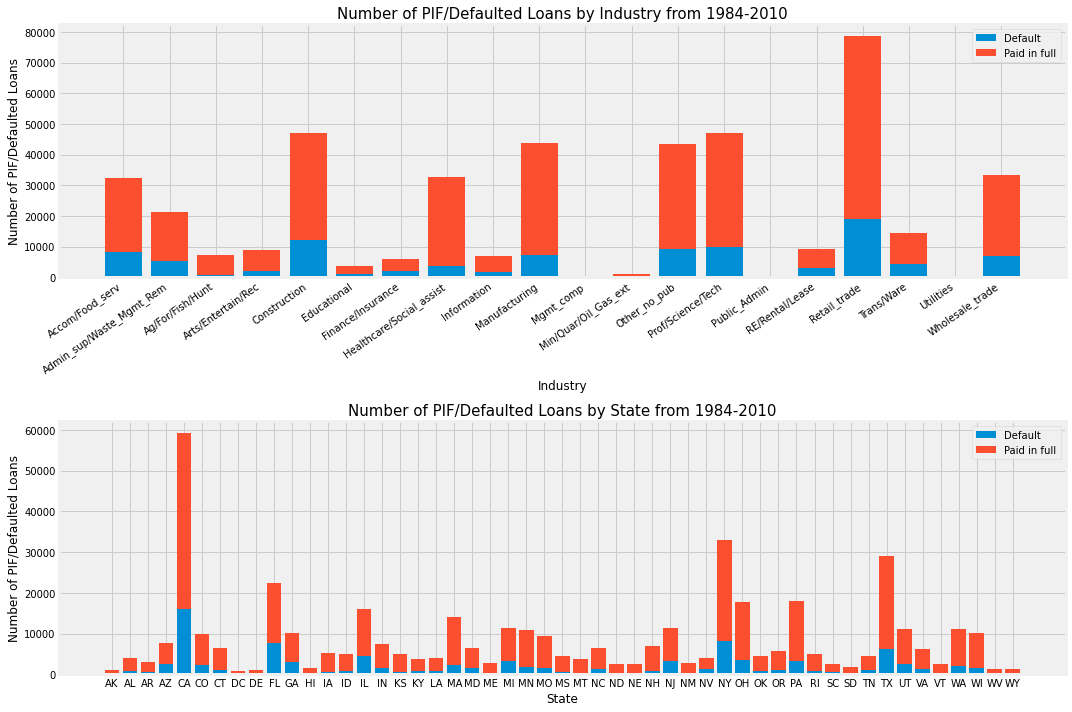

In [43]:
# Paid in full and defaulted loans
pic3 = plt.figure(figsize=(15, 10))

ax1a = plt.subplot(2, 1, 1)
ax2a = plt.subplot(2, 1, 2)

# Function for creating stacked bar charts grouped by desired column
# df = original data frame, col = x-axis grouping, stack_col = column to show stacked values
# Essentially acts as a stacked histogram when stack_col is a flag variable
def stacked_setup(df, col, axes, stack_col='Default'):
    data1 = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data1.fillna(0)

    axes.bar(data1.index, data1[1], label='Default')
    axes.bar(data1.index, data1[0], bottom=data1[1], label='Paid in full')


# Number of Paid in full and defaulted loans by industry
stacked_setup(df=data, col='Industry', axes=ax1a)
ax1a.set_xticklabels(data.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=15)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()

# Number of Paid in full and defaulted loans by State
stacked_setup(df=data, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

plt.tight_layout()
plt.show()

In [44]:
# Check Default percentage by Industry
def_ind = data.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])
def_ind

Default                       0      1  Def_Percent
Industry                                           
Accom/Food_serv           23936   8381     0.259337
Admin_sup/Waste_Mgmt_Rem  15774   5427     0.255978
Ag/For/Fish/Hunt           6536    657     0.091339
Arts/Entertain/Rec         6976   1917     0.215563
Construction              34999  12048     0.256084
Educational                2750   1070     0.280105
Finance/Insurance          3984   2093     0.344413
Healthcare/Social_assist  29192   3571     0.108995
Information                5222   1830     0.259501
Manufacturing             36448   7281     0.166503
Mgmt_comp                    90     23     0.203540
Min/Quar/Oil_Gas_ext       1133    117     0.093600
Other_no_pub              34192   9351     0.214753
Prof/Science/Tech         37278   9803     0.208216
Public_Admin                151     29     0.161111
RE/Rental/Lease            6079   3097     0.337511
Retail_trade              59503  19051     0.242521
Trans/Ware                10016   4430     0.306659
Utilities                   334     79     0.191283
Wholesale_trade           26224   7018     0.211118

In [45]:
# Check Default percentage by State
def_state = data.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state

Default      0      1  Def_Percent
State                             
AK         979     94     0.087605
AL        3192    805     0.201401
AR        2414    528     0.179470
AZ        5119   2473     0.325738
CA       42983  16138     0.272966
...        ...    ...          ...
VT        2222    199     0.082197
WA        9015   2074     0.187032
WI        8591   1463     0.145514
WV        1188    212     0.151429
WY        1156     69     0.056327

[51 rows x 3 columns]

*   Industries with the highest number of loans during sample period: Retail trade (78,554), Professional, scientific and technical services (47,081) and Construction (47,047)
*   Industries with the highest Default percentage: Finance and Insurance (34.4%), Real Estate and rental leasing (33.8%) and Transportation and warehousing (30.7%)
*   States with the highest number of loans during sample period: California (59,121), New York (33,059) and Texas (28,941)
*   State with the highest Default percentage: Florida (33.8%), Arizona (32.6%) and Nevada (31.6%)

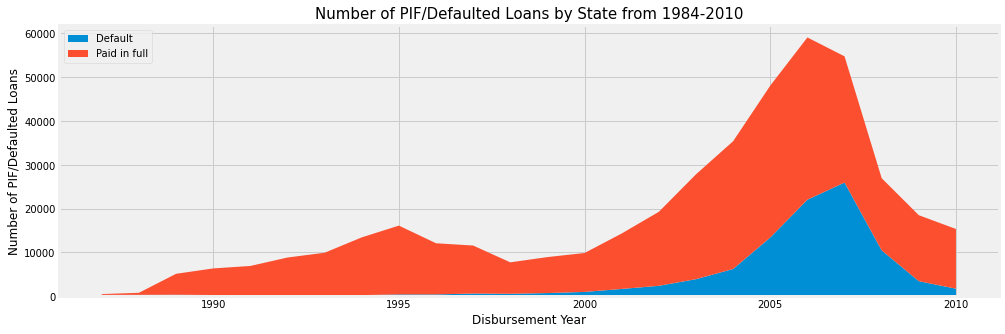

In [46]:
# Paid in full and Defaulted loans by DisbursementFY
# Decided to use a stacked area chart here since it's time series data
fig4, ax4 = plt.subplots(figsize=(15, 5))

stack_data = data.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')
x = stack_data.index
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels=['Default', 'Paid in full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left')

plt.show()

There is a clear increase in loan volume leading up to the peak of the Great Recession, with a subsequent drop in loan volume immediately following that time. Looking at the graph, it appears the default rate of loans increased during that time as well.

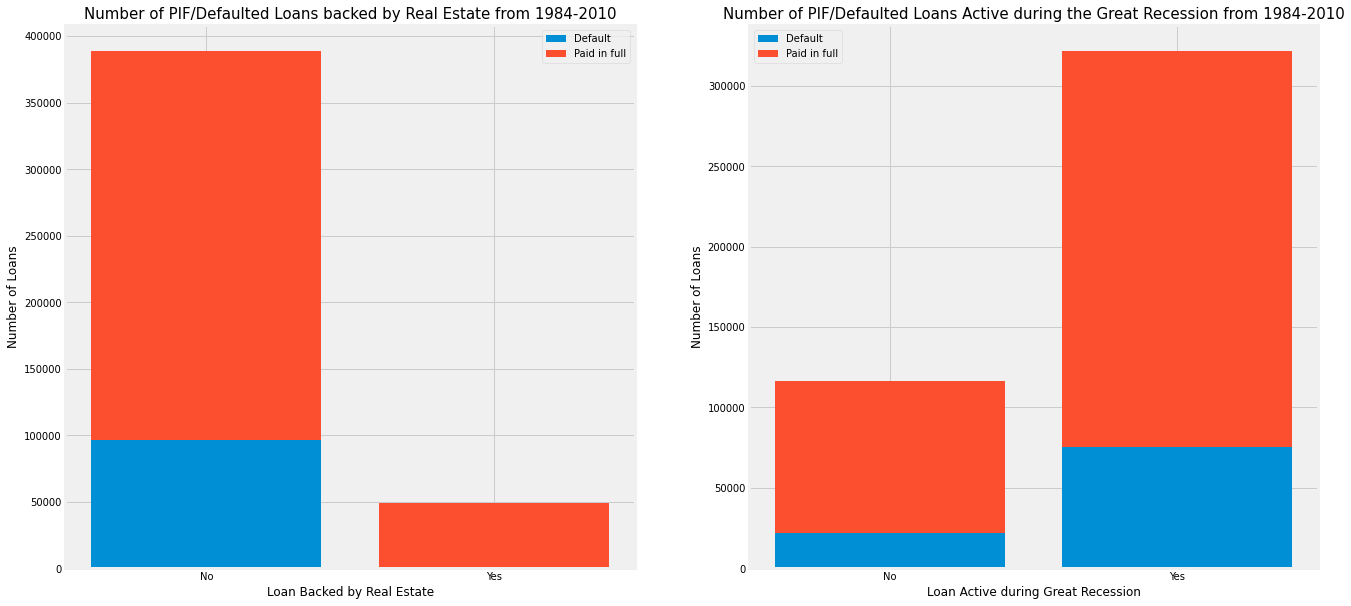

In [47]:
# Paid in full and defaulted loans backed by Real Estate
pic5 = plt.figure(figsize=(20, 10))

ax1b = pic5.add_subplot(1, 2, 1)
ax2b = pic5.add_subplot(1, 2, 2)

stacked_setup(df=data, col='RealEstate', axes=ax1b)
ax1b.set_xticks(data.groupby(['RealEstate', 'Default'])['RealEstate'].count().unstack('Default').index)
ax1b.set_xticklabels(labels=['No', 'Yes'])

ax1b.set_title('Number of PIF/Defaulted Loans backed by Real Estate from 1984-2010', fontsize=15)
ax1b.set_xlabel('Loan Backed by Real Estate')
ax1b.set_ylabel('Number of Loans')
ax1b.legend()

# Paid in full and defaulted loans active during the Great Recession
stacked_setup(df=data, col='GreatRecession', axes=ax2b)
ax2b.set_xticks(data.groupby(['GreatRecession', 'Default'])['GreatRecession'].count().unstack('Default').index)
ax2b.set_xticklabels(labels=['No', 'Yes'])

ax2b.set_title('Number of PIF/Defaulted Loans Active during the Great Recession from 1984-2010', fontsize=15)
ax2b.set_xlabel('Loan Active during Great Recession')
ax2b.set_ylabel('Number of Loans')
ax2b.legend()

plt.show()

In [48]:
# Check Default percentage for loans backed by Real Estate
def_re = data.groupby(['RealEstate', 'Default'])['RealEstate'].count().unstack('Default')
def_re['Def_Percent'] = def_re[1]/(def_re[1] + def_re[0])
def_re

Default          0      1  Def_Percent
RealEstate                            
0           292446  96587     0.248275
1            48371    686     0.013984

The volume of loans backed by real estate was much less than those not backed by real estate (which makes sense that most people aren't willing to take on that much risk), however the default rate is also much less for loans backed by real estate. This is likely because the people and businesses who have their loans backed by real estate have much more skin in the game so they're more willing to do what it takes to pay the debt.

I thought loans active during the Great Recession would have a noticeably higher default rate than those not active during that time. My assumption is this difference would be more apparent if the focus was on loans disbursed in the few years leading up to the Great Recession, perhaps beginning in 2004 or 2005.

In [49]:
data.dtypes

State                    object
BankState                object
ApprovalFY                int64
Term                      int64
NoEmp                     int64
CreateJob                 int64
RetainedJob               int64
UrbanRural               object
RevLineCr                 int64
LowDoc                    int64
DisbursementGross       float64
GrAppv                  float64
Industry                 object
IsFranchise               int64
NewBusiness               int64
Default                   int64
DaysToDisbursement        int64
DisbursementFY            int64
StateSame                 int64
SBA_AppvPct             float64
AppvDisbursed             int64
RealEstate                int64
GreatRecession            int64
DisbursedGreaterAppv      int64
dtype: object

DATA MODELS

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score, precision_score
from sklearn.metrics import classification_report

Creating Dummy Variables for Categorical Columns

In [51]:
from sklearn import preprocessing

# encode categorical variables using label Encoder

# select all categorical variables
data_categorical = data.select_dtypes(include=['object'])
data_categorical.head()

State BankState UrbanRural                  Industry
0    IN        OH          0              Retail_trade
1    IN        IN          0           Accom/Food_serv
2    IN        IN          0  Healthcare/Social_assist
5    CT        DE          0             Manufacturing
7    FL        AL          0              Other_no_pub

In [52]:
le = preprocessing.LabelEncoder()
data_categorical = data_categorical.apply(le.fit_transform)
data_categorical.head()

State  BankState  UrbanRural  Industry
0     15         36           0        16
1     15         16           0         0
2     15         16           0         7
5      6          8           0         9
7      9          1           0        12

In [53]:
# Next, Concatenate data_categorical dataframe with original dataframe (data)

# first, Drop earlier duplicate columns which had categorical values
data = data.drop(data_categorical.columns,axis=1)
data = pd.concat([data,data_categorical],axis=1)
data.head()

ApprovalFY  Term  NoEmp  CreateJob  RetainedJob  RevLineCr  LowDoc  DisbursementGross    GrAppv  IsFranchise  NewBusiness  Default  DaysToDisbursement  DisbursementFY  StateSame  SBA_AppvPct  AppvDisbursed  RealEstate  GreatRecession  DisbursedGreaterAppv  State  BankState  UrbanRural  Industry
0        1997    84      4          0            0          0       1            60000.0   60000.0            0            1        0                 730            1999          0         0.80              1           0               0                     0     15         36           0        16
1        1997    60      2          0            0          0       1            40000.0   40000.0            0            1        0                  92            1997          1         0.80              1           0               0                     0     15         16           0         0
2        1997   180      7          0            0          0       0           287000.0  287000.0            0            0        0                 306            1997          1         0.75              1           0               1                     0     15         16           0         7
5        1997   120     19          0            0          0       0           517000.0  517000.0            0            0        0                 122            1997          0         0.75              1           0               1                     0      6          8           0         9
7        1997    84      1          0            0          0       1            45000.0   45000.0            0            1        0                 487            1998          0         0.80              1           0               0                     0      9          1           0        12

In [54]:
#create dummy variables for the categorical variables in the dataset
temp = pd.get_dummies(data, drop_first=True)
data.head()

ApprovalFY  Term  NoEmp  CreateJob  RetainedJob  RevLineCr  LowDoc  DisbursementGross    GrAppv  IsFranchise  NewBusiness  Default  DaysToDisbursement  DisbursementFY  StateSame  SBA_AppvPct  AppvDisbursed  RealEstate  GreatRecession  DisbursedGreaterAppv  State  BankState  UrbanRural  Industry
0        1997    84      4          0            0          0       1            60000.0   60000.0            0            1        0                 730            1999          0         0.80              1           0               0                     0     15         36           0        16
1        1997    60      2          0            0          0       1            40000.0   40000.0            0            1        0                  92            1997          1         0.80              1           0               0                     0     15         16           0         0
2        1997   180      7          0            0          0       0           287000.0  287000.0            0            0        0                 306            1997          1         0.75              1           0               1                     0     15         16           0         7
5        1997   120     19          0            0          0       0           517000.0  517000.0            0            0        0                 122            1997          0         0.75              1           0               1                     0      6          8           0         9
7        1997    84      1          0            0          0       1            45000.0   45000.0            0            1        0                 487            1998          0         0.80              1           0               0                     0      9          1           0        12

In [55]:
x = data.drop(columns=['Default'])
y = data['Default']

In [56]:
##train and test split
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.75,random_state=101,stratify = y)

x_train,x_test,y_train,y_test=train_test_split(x_train1,y_train1,test_size=0.2,random_state=101,stratify = y_train1)


As because our dataset is quite large I have sampled dataset of around 10000 entries to get faster result. In a TPU environment we can use the actual approx 400000 sample in 70-30 split

In [57]:
x_train
y_train

367027    0
880052    0
733006    0
449583    0
384333    0
         ..
366525    0
583552    0
13100     0
864430    0
700090    0
Name: Default, Length: 87617, dtype: int64

Model 1 : LOGISTIC REGRESSION

In [58]:
#Fit a logistic regression model. 
# Show precision, recall, F-score, and confusion matrix and interpret the results.

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [59]:
len(y_pred)

21905

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[15982  1059]
 [ 3176  1688]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     17041
           1       0.61      0.35      0.44      4864

    accuracy                           0.81     21905
   macro avg       0.72      0.64      0.66     21905
weighted avg       0.79      0.81      0.79     21905



Logistic Regession acquracy score is 81%. 

As we already have a large dataset the acquracy score is quite high and no need to scale the data or normalize at this point. I next would focus on building decision tree to check the acquiracy score

Model 2: DECISION TREE

In [61]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [62]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [63]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = dt_default.predict(x_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     17041
           1       0.79      0.76      0.78      4864

    accuracy                           0.90     21905
   macro avg       0.86      0.85      0.86     21905
weighted avg       0.90      0.90      0.90     21905



The decision tree acquiracy score is 90% with the default model

In [64]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[16070   971]
 [ 1156  3708]]
0.9028988815338964


In [65]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [66]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [67]:
# Putting features
features = list (data.columns[1:])
features

['Term',
 'NoEmp',
 'CreateJob',
 'RetainedJob',
 'RevLineCr',
 'LowDoc',
 'DisbursementGross',
 'GrAppv',
 'IsFranchise',
 'NewBusiness',
 'Default',
 'DaysToDisbursement',
 'DisbursementFY',
 'StateSame',
 'SBA_AppvPct',
 'AppvDisbursed',
 'RealEstate',
 'GreatRecession',
 'DisbursedGreaterAppv',
 'State',
 'BankState',
 'UrbanRural',
 'Industry']

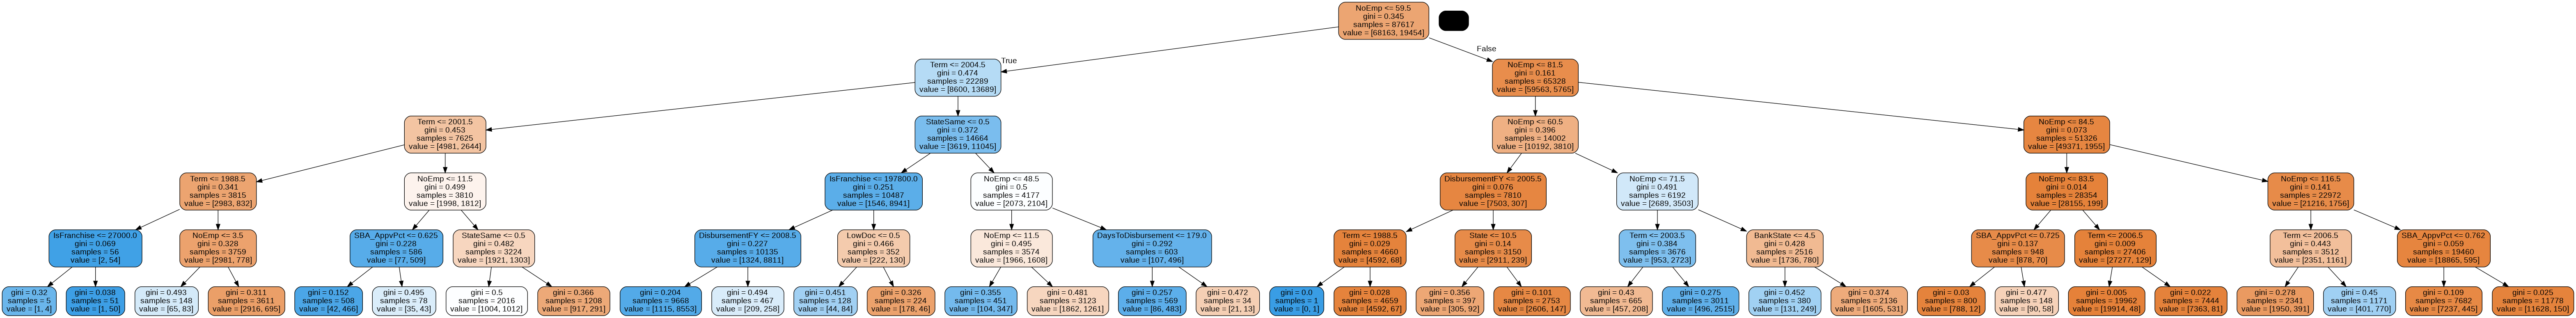

In [68]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Tuning max_depth
Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

Here, I am creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth.

In [69]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [70]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth            params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0       0.064357      0.011556         0.005149        0.001172               1  {'max_depth': 1}           0.834513           0.839192           0.838156           0.833019           0.835359         0.836048        0.002295               39
1       0.093724      0.002192         0.004689        0.000079               2  {'max_depth': 2}           0.861504           0.862474           0.864121           0.860241           0.865263         0.862721        0.001795               38
2       0.132453      0.006621         0.005425        0.000892               3  {'max_depth': 3}           0.871662           0.870520           0.871940           0.870456           0.870171         0.870950        0.000710               37
3       0.166704      0.003635         0.005235        0.000142               4  {'max_depth': 4}           0.894488           0.891406           0.894253           0.892884           0.892427         0.893092        0.001151               36
4       0.196734      0.001894         0.005266        0.000072               5  {'max_depth': 5}           0.904645           0.901963           0.901786           0.903213           0.904982         0.903318        0.001321               35

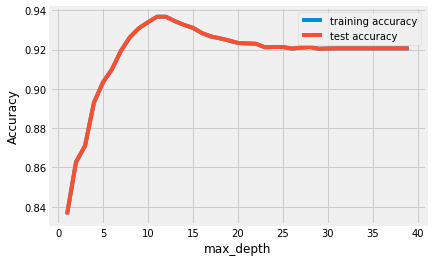

In [71]:
#plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

After a point of 10-12 it starts to overfit as per the model

In [72]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [73]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_leaf                    params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0       0.488219      0.007617         0.007236        0.000969                      5   {'min_samples_leaf': 5}           0.932264           0.931294           0.931404           0.934600           0.932717         0.932456        0.001197                3
1       0.426374      0.005855         0.006381        0.000198                     25  {'min_samples_leaf': 25}           0.937172           0.935175           0.937568           0.937168           0.938253         0.937067        0.001026                1
2       0.403843      0.007212         0.006229        0.000160                     45  {'min_samples_leaf': 45}           0.936373           0.932550           0.932888           0.935742           0.936027         0.934716        0.001646                2
3       0.386436      0.008358         0.006270        0.000332                     65  {'min_samples_leaf': 65}           0.931979           0.929639           0.929008           0.932375           0.933345         0.931269        0.001662                4
4       0.380081      0.008142         0.006651        0.000873                     85  {'min_samples_leaf': 85}           0.929183           0.926387           0.928095           0.929692           0.930548         0.928781        0.001437                5

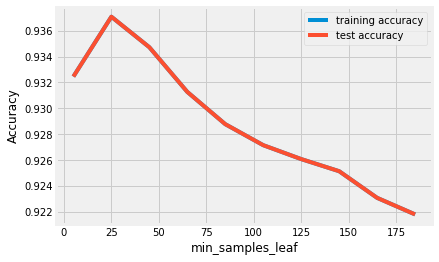

In [74]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_split The hyperparameter min_samples_split is the minimum no. of samples required to split an internal node. Its default value is 25, which means that even if a node is having 25 samples it can be furthur divided into leaf nodes.

In [75]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [76]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_split                     params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0       0.520714      0.019467         0.006836        0.000190                       5   {'min_samples_split': 5}           0.919938           0.920623           0.924271           0.924670           0.925698         0.923040        0.002311               10
1       0.499347      0.008513         0.007049        0.000665                      25  {'min_samples_split': 25}           0.931408           0.931408           0.934714           0.934543           0.935285         0.933472        0.001703                9
2       0.484258      0.004251         0.006635        0.000233                      45  {'min_samples_split': 45}           0.933691           0.936259           0.937682           0.937454           0.938310         0.936679        0.001635                4
3       0.491830      0.017577         0.006781        0.000392                      65  {'min_samples_split': 65}           0.935460           0.936430           0.938138           0.938595           0.938652         0.937455        0.001283                2
4       0.474886      0.011387         0.006706        0.000389                      85  {'min_samples_split': 85}           0.937400           0.936715           0.938081           0.937682           0.939622         0.937900        0.000970                1

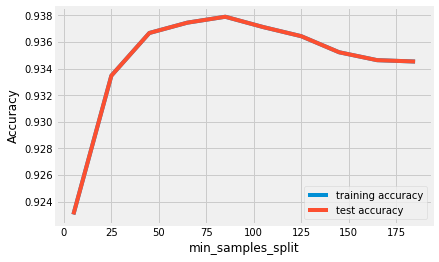

In [77]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, I shall also specify the criterion (gini/entropy or IG)

In [78]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [79]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_criterion param_max_depth param_min_samples_leaf param_min_samples_split                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0        0.213822      0.005633         0.005170        0.000162         entropy               5                     50                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.900651           0.900993           0.900816           0.897620           0.896993         0.899414        0.001736               13
1        0.208445      0.002312         0.005095        0.000120         entropy               5                     50                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.900651           0.900993           0.900816           0.897620           0.896993         0.899414        0.001736               13
2        0.207350      0.003005         0.005031        0.000081         entropy               5                    100                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.900194           0.900993           0.900702           0.897506           0.896479         0.899175        0.001829               15
3        0.207075      0.002664         0.005134        0.000155         entropy               5                    100                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.900194           0.900993           0.900702           0.897506           0.896479         0.899175        0.001829               15
4        0.353487      0.007113         0.005802        0.000096         entropy              10                     50                      50  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.930324           0.929126           0.931690           0.928779           0.933116         0.930607        0.001618                1
5        0.348220      0.003000         0.005773        0.000056         entropy              10                     50                     100  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.930324           0.929126           0.931176           0.928779           0.933116         0.930504        0.001561                2
6        0.343614      0.008059         0.005747        0.000156         entropy              10                    100                      50  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.924504           0.926729           0.929179           0.923814           0.927980         0.926441        0.002030                5
7        0.339180      0.005573         0.005884        0.000230         entropy              10                    100                     100  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.924504           0.926729           0.929179           0.923814           0.927980         0.926441        0.002030                5
8        0.195435      0.002497         0.005001        0.000041            gini               5                     50                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.904303           0.901392           0.901501           0.902585           0.904640         0.902884        0.001365                9
9        0.207543      0.004519         0.005290        0.000341            gini               5                     50                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.904303           0.901392           0.901501           0.902585           0.904640         0.902884        0.001365                9
10       0.200568      0.010859         0.005241        0.000344            gini               5                    100                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.904017           0.901507           0.901216           0.

In [80]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.930607094106063
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50)


Our best accuracy model is 93.06% using decision tree

In [101]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

So the max depth is 10, min sample leaf is 100, min sample split 50 for the optimal hyperparameter

In [102]:
# accuracy score
clf_gini.score(x_test,y_test)

0.9270029673590504

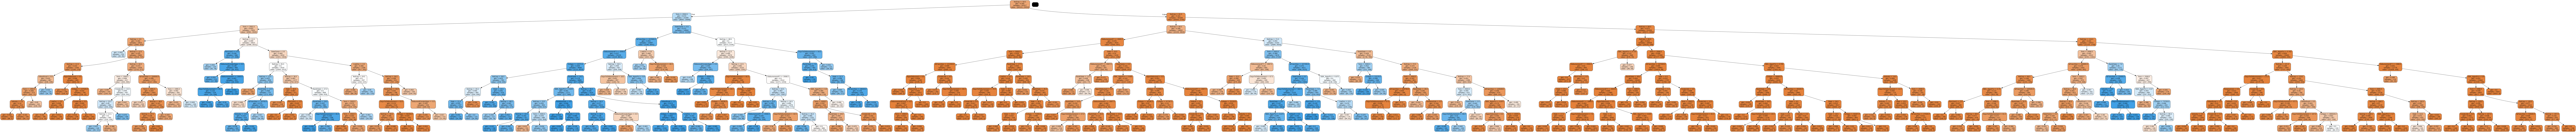

In [83]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Model 3 : SGD classifier

In [100]:
# Pipelines to normalize numeric values and build SGD classifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
#from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
#parameters = {'C':[1,5,10,50,100,500,1000], 'epsilon':[0.05, 0.1, 0.15, 0.2]}
#parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.05, 0.1, 0.15, 0.2]}
#parameters = {'kernel': ('linear'), 'C':[1,5,10,50,100,500,1000], 'epsilon':[0.05, 0.1, 0.15, 0.2]}
#svr = SVR()
#clf = GridSearchCV(svr, parameters)
#clf.fit(x,y)
#clf.best_params_


sgd = SGDClassifier()
#sgd_pipe = Pipeline([('scaler', MinMaxScaler()), ('SGD', SGDClassifier())])
#svr_pipe = Pipeline([('scaler', MinMaxScaler()), ('linear_svr', SVR(kernel='linear', gamma=1.0E-12))])
#svr_pipe = Pipeline([('scaler', MinMaxScaler()), ('linear_svr', SVR(kernel='poly'))])

#svr.fit(x, y)

### Grid search for the best param

In [95]:
# 5-fold cross validation - using cross_val_score
from sklearn.model_selection import GridSearchCV

#param_grid = {'linear_svr__kernel': ('linear', 'rbf','poly'), 'linear_svr__C': [1,5,10,50,100,500,1000], 'linear_svr__epsilon': [0.05, 0.1, 0.15, 0.2], 'linear_svr__gamma':[1e-7, 1e-4, 1.0E-12]}
param_grid = {
    "loss" : ["hinge", "log"],
    "alpha" : [0.0001, 0.001],
    "penalty" : ["l2", "l1", "none"],
}
#param_grid = {'linear_svr__C': [5], 'linear_svr__epsilon': [0.15]}
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring="accuracy")
#grid_search = GridSearchCV(svr_pipe, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001], 'loss': ['hinge', 'log'],
                         'penalty': ['l2', 'l1', 'none']},
             scoring='accuracy')

In [96]:
grid_search.best_params_

{'alpha': 0.0001, 'loss': 'log', 'penalty': 'l1'}

In [97]:
grid_search.best_score_

0.806852776517817

In [103]:
sgd = SGDClassifier(alpha = 0.0001, loss = 'log', penalty = 'l1')

sgd.fit(x_train, y_train)

# making predictions
y_pred = sgd.predict(x_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     17041
           1       0.62      0.41      0.49      4864

    accuracy                           0.81     21905
   macro avg       0.73      0.67      0.69     21905
weighted avg       0.80      0.81      0.80     21905



SGD model acquiracy 81%